# Financial Loan Default Prediction

Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans.

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021.

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('Data Science Coding Challenge-Loan Default Prediction/data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and display the shape of the dataframes.

In [3]:
train_df = pd.read_csv("Data Science Coding Challenge-Loan Default Prediction/train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


We have 255347 loans (data points) each with 18 variables

In [4]:
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


## Exploratory Data Analysis

- Before we go any further it is important to understand the type of data stored in our columns and if our dataset contains any missing values

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

We know we have 3 data types:
- int64 (whole number)
- float64 (floating point number)
- object (string or non-numeric)


In [6]:
train_df.isnull()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255343,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255345,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train_df.isnull().any()

LoanID            False
Age               False
Income            False
LoanAmount        False
CreditScore       False
MonthsEmployed    False
NumCreditLines    False
InterestRate      False
LoanTerm          False
DTIRatio          False
Education         False
EmploymentType    False
MaritalStatus     False
HasMortgage       False
HasDependents     False
LoanPurpose       False
HasCoSigner       False
Default           False
dtype: bool

The columns of our dataset contains no missing values

- Another good starting for exploratory analysis is to look at the number of unique values in each column

In [8]:
train_df.nunique()

LoanID            255347
Age                   52
Income            114620
LoanAmount        158729
CreditScore          550
MonthsEmployed       120
NumCreditLines         4
InterestRate        2301
LoanTerm               5
DTIRatio              81
Education              4
EmploymentType         4
MaritalStatus          3
HasMortgage            2
HasDependents          2
LoanPurpose            5
HasCoSigner            2
Default                2
dtype: int64

In [9]:
# Check for duplicates
print(train_df.duplicated().sum())

0


There are no unique values 

- Summary Statistics: Look at the mean, median, IQR, standard deviation and min/max to get an idea of the range of data and how it is distributed

In [10]:
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [11]:
train_df["Age"].describe()

count    255347.000000
mean         43.498306
std          14.990258
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64

Note that the mean age of custumers is 43.50, while their median is 43.00. So, there is no skewness. 
The minimum age is of 18 and the maximum age of 69 which are reasonable and there are no erroneous outliers. 
The maximum age is not that bigger than the 3rd Q, which means there is no right tail.

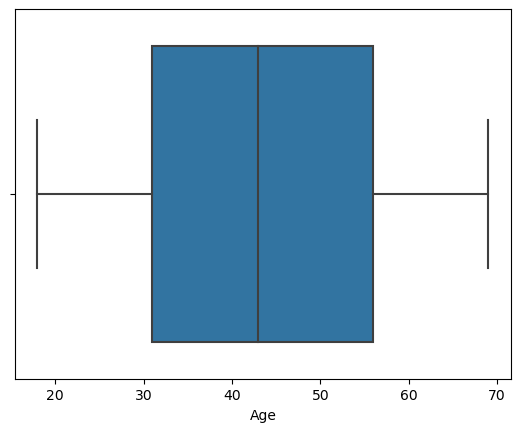

In [12]:
sns.boxplot(x="Age", data=train_df)
plt.show()

/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_57946/260291583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age'], hist=False)
/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


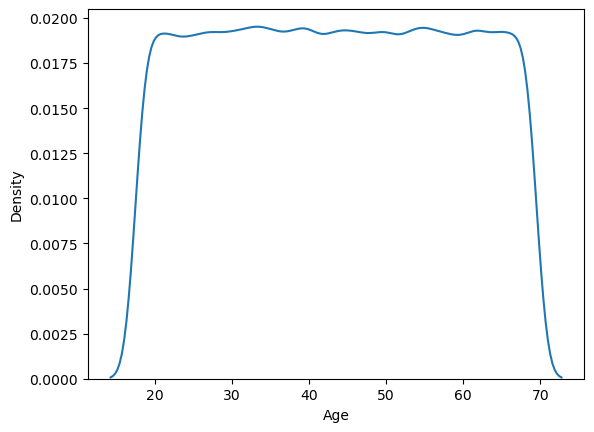

In [13]:
sns.distplot(train_df['Age'], hist=False)
plt.show()

- Explore the relationship between our continuous variables and the loan default

In [14]:
train_df.groupby('Default')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,44.409962,14.889574,18.0,32.0,45.0,57.0,69.0
1,29653.0,36.559539,13.897468,18.0,25.0,34.0,47.0,69.0


The people who defaulted were generally younger

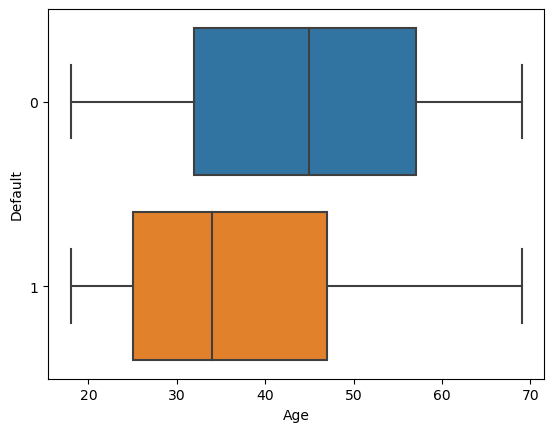

In [15]:
sns.boxplot(x='Age', y='Default', data=train_df, orient="h")
plt.show()

The distribution of AGE within the group of people who defaulted was marginally younger! 

- Explore the target variable: How many people defaulted on their loans?
    

In [16]:
train_df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

We can see that out of 225694 loans, there are 29653 customers who defaulted.

In [17]:
train_df['Default'].value_counts(normalize=True)

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

The rate of defaulted loans is about 11.61% 

- Visualize the target variable

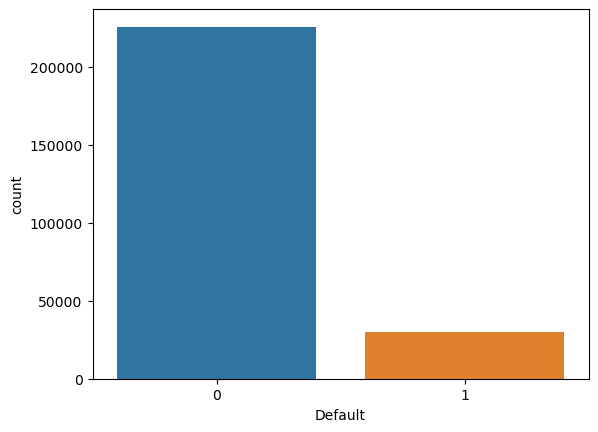

In [18]:
sns.countplot(x="Default", data=train_df)
plt.show()

- Now we can start to see how loan defaults are distributed within Employment types

In [19]:
train_df.groupby('EmploymentType')['Default'].value_counts(normalize=True).unstack(level=-1)

Default,0,1
EmploymentType,,
Full-time,0.905366,0.094634
Part-time,0.880348,0.119652
Self-employed,0.885380,0.114620
Unemployed,0.864471,0.135529


In [20]:
train_df.groupby(['EmploymentType', 'CreditScore', 'MaritalStatus'])['Default'].value_counts(normalize=True).unstack(level=1)

CreditScore                                300       301       302       303  \
EmploymentType MaritalStatus Default                                           
Full-time      Divorced      0        0.897436  0.921053  0.925000  0.837209   
                             1        0.102564  0.078947  0.075000  0.162791   
               Married       0        0.931818  0.951220  0.894737  0.941176   
                             1        0.068182  0.048780  0.105263  0.058824   
               Single        0        1.000000  0.828571  0.850000  0.860465   
                             1             NaN  0.171429  0.150000  0.139535   
Part-time      Divorced      0        0.702703  0.772727  0.795455  0.815789   
                             1        0.297297  0.227273  0.204545  0.184211   
               Married       0        0.770833  0.789474  0.909091  0.947368   
                             1        0.229167  0.210526  0.090909  0.052632   
               Single        0        0.850000  0.805556  0.833333  0.815789   
                             1        0.150000  0.194444  0.166667  0.184211   
Self-employed  Divorced      0        0.805556  0.837838  0.818182  0.869565   
                             1        0.194444  0.162162  0.181818  0.130435   
               Married       0        0.906977  0.916667  0.914286  0.816327   
                             1        0.093023  0.083333  0.085714  0.183673   
               Single        0        0.843750  0.809524  0.764706  0.868421   
                             1        0.156250  0.190476  0.235294  0.131579   
Unemployed     Divorced      0        0.820000  0.787879  0.880952  0.823529   
                             1        0.180000  0.212121  0.119048  0.176471   
               Married       0        0.782609  0.866667  0.897436  0.875000   
                             1        0.217391  0.133333  0.102564  0.125000   
               Single        0        0.871795  0.885714  0.781250  0.875000   
                             1        0.128205  0.114286  0.218750  0.125000   

CreditScore                                304       305       306       307  \
EmploymentType MaritalStatus Default                                           
Full-time      Divorced      0        0.878788  0.925000  0.914286  0.878049   
                             1        0.121212  0.075000  0.085714  0.121951   
               Married       0        0.857143  0.931818  0.902439  0.916667   
                             1        0.142857  0.068182  0.097561  0.083333   
               Single        0        0.880000  0.888889  0.891892  0.878049   
                             1        0.120000  0.111111  0.108108  0.121951   
Part-time      Divorced      0        0.866667  0.863636  0.894737  0.789474   
                             1        0.133333  0.136364  0.105263  0.210526   
               Married       0        0.928571  0.928571  0.742857  0.926829   
                             1        0.071429  0.071429  0.257143  0.073171   
               Single        0        0.857143  0.885714  0.866667  0.860465   
                             1        0.142857  0.114286  0.133333  0.139535   
Self-employed  Divorced      0        0.840000  0.810811  0.783784  0.744186   
                             1        0.160000  0.189189  0.216216  0.255814   
               Married       0        0.897959  0.800000  0.888889  0.888889   
                             1        0.102041  0.200000  0.111111  0.111111   
               Single        0        0.900000  0.790698  0.939394  0.944444   
                             1        0.100000  0.209302  0.060606  0.055556   
Unemployed     Divorced      0        0.815789  0.789474  0.878049  0.875000   
                             1        0.184211  0.210526  0.121951  0.125000   
               Married       0        0.807692  0.925000  0.903226  0.894737   
                             1        0.192308  0.075000  0.096774  0.105263   

It looks like loans for some customers with some specific characteristics default at higher rates than others.

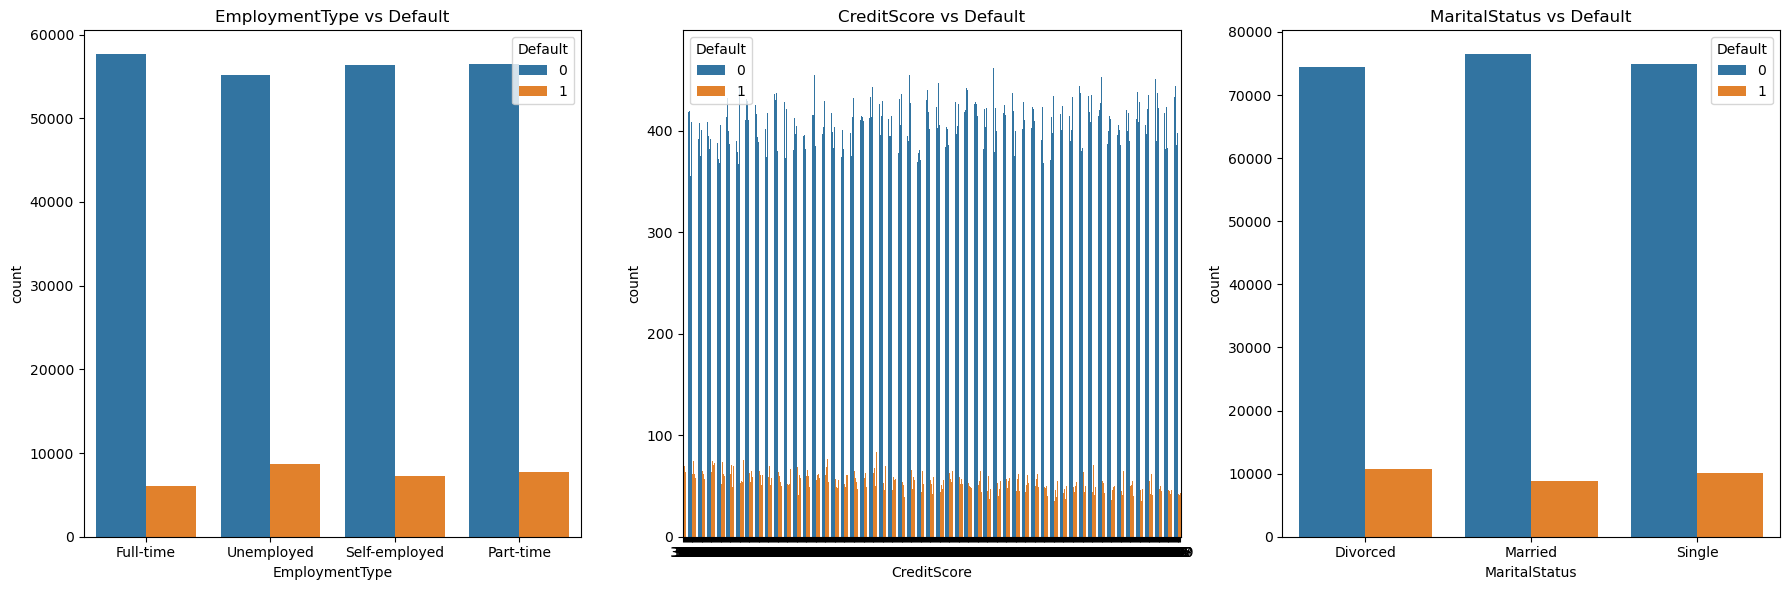

In [21]:
# List of variables to plot
variables = ['EmploymentType', 'CreditScore', 'MaritalStatus']

# Create a figure with 1 row and 3 columns (for 3 plots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # You can adjust the figsize for better spacing

# Loop through each variable and create the count plot
for i, var in enumerate(variables):
    sns.countplot(data=train_df, x=var, hue='Default', ax=axes[i])
    axes[i].set_title(f'{var} vs Default')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Load, Explore and Clean Data of test_df

In [22]:
test_df = pd.read_csv("Data Science Coding Challenge-Loan Default Prediction/test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109435 entries, 0 to 109434
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          109435 non-null  object 
 1   Age             109435 non-null  int64  
 2   Income          109435 non-null  int64  
 3   LoanAmount      109435 non-null  int64  
 4   CreditScore     109435 non-null  int64  
 5   MonthsEmployed  109435 non-null  int64  
 6   NumCreditLines  109435 non-null  int64  
 7   InterestRate    109435 non-null  float64
 8   LoanTerm        109435 non-null  int64  
 9   DTIRatio        109435 non-null  float64
 10  Education       109435 non-null  object 
 11  EmploymentType  109435 non-null  object 
 12  MaritalStatus   109435 non-null  object 
 13  HasMortgage     109435 non-null  object 
 14  HasDependents   109435 non-null  object 
 15  LoanPurpose     109435 non-null  object 
 16  HasCoSigner     109435 non-null  object 
dtypes: float64

In [24]:
# Check for missing values
print(test_df.isnull().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64


In [25]:
# Check data types
print(test_df.dtypes)

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
dtype: object


In [26]:
# Check for duplicates
print(test_df.duplicated().sum())

0


## Model predictions 

Let's create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans using a Dummy Classifier.



### Using DummyClassifier as a Baseline for Loan Default Prediction

- Step 1: Load the training data and drop the target variable.

- Step 2: Identify numeric columns and calculate their mean.

- Step 3: Use X_train_mean to fill missing values in the test data.

- Step 4: One-hot encode both training and test data.

- Step 5: Align test data columns with training data columns.

- Step 6: Scale the test data using the scaler fitted on the training data.

In [27]:
# Prepare features and target
X_train = train_df.drop(['LoanID', 'Default'], axis=1)  
y_train = train_df['Default'] 

# Handle missing data in numeric columns
numeric_columns_train = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numeric_columns_train] = X_train[numeric_columns_train].fillna(X_train[numeric_columns_train].mean())

# Calculate the mean of numeric columns from the training data
X_train_mean = X_train[numeric_columns_train].mean()

# One-hot encode categorical features for training data
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['LoanID', 'Default'], axis=1), train_df.Default)

DummyClassifier(strategy='stratified')

In [28]:
# Prepare the features for test data
X_test = test_df.drop(['LoanID'], axis=1)

# Handle missing data in numeric columns using the training data mean
numeric_columns_test = X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[numeric_columns_test] = X_test[numeric_columns_test].fillna(X_train_mean)

# One-hot encode categorical features for test data
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align test data columns with training data and fill missing columns with zeros
X_test_aligned, _ = X_test_encoded.align(X_train_encoded, join='left', axis=1, fill_value=0)

# Scale the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test_aligned)

# Check if the number of rows in X_test matches the expected 104,480
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]

Shape of X_test_scaled: (109435, 24)


In [29]:
# Check if predicted probabilities are all 0
print(f"Predicted probabilities (first 10): {predicted_probability[:10]}")

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

Predicted probabilities (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [30]:
# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [31]:
# View our 'prediction_df' dataframe as required for submission
# Ensure it should contain 104,480 rows and 2 columns 'LoanID' and 'predicted_probability'
print(prediction_df.shape)  

# Preview the first few rows to check the format
print(prediction_df.head(10))

(109435, 2)
       LoanID  predicted_probability
0  7RYZGMKJIR                    0.0
1  JDL5RH07AM                    0.0
2  STAL716Y79                    0.0
3  SO0KKJ3IQB                    0.0
4  T99CWTYDCP                    0.0
5  0SNHFWV4UP                    0.0
6  S6ITP6LGYS                    0.0
7  A6I7U12IRJ                    0.0
8  8W6KY50JU4                    0.0
9  THFQ08OLMU                    1.0


In [32]:
# Convert Numerical Columns to Float
train_df[['Income', 'CreditScore', 'LoanAmount']] = train_df[['Income', 'CreditScore', 'LoanAmount']].apply(pd.to_numeric, errors='coerce')

In [33]:
# Encode Binary Categorical Variables
train_df['HasMortgage'] = train_df['HasMortgage'].map({'Yes': 1, 'No': 0})
train_df['HasDependents'] = train_df['HasDependents'].map({'Yes': 1, 'No': 0})
train_df['HasCoSigner'] = train_df['HasCoSigner'].map({'Yes': 1, 'No': 0})

In [34]:
from sklearn.impute import SimpleImputer

# Use ColumnTransformer to handle categorical and numerical columns separately.

categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']
numerical_cols = ['Income', 'CreditScore', 'LoanAmount']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder())
        ]), categorical_cols),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]), numerical_cols)
    ]
)

In [35]:
# Create a pipeline with preprocessing and DummyClassifier.
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])

In [36]:
# Model Training and Evaluation
# Fit the model on the training data
pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {accuracy:.4f}")

Training accuracy: 0.8839


In [37]:
# Exploring Different Strategies: Try different strategies like 'stratified', 'prior', and 'uniform'.
# Stratified strategy
pipeline_stratified = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='stratified'))
])
pipeline_stratified.fit(X_train, y_train)
y_train_pred_strat = pipeline_stratified.predict(X_train)
accuracy_strat = accuracy_score(y_train, y_train_pred_strat)
print(f"Training accuracy with stratified strategy: {accuracy_strat:.4f}")

# Prior strategy
pipeline_prior = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='prior'))
])
pipeline_prior.fit(X_train, y_train)
y_train_pred_prior = pipeline_prior.predict(X_train)
accuracy_prior = accuracy_score(y_train, y_train_pred_prior)
print(f"Training accuracy with prior strategy: {accuracy_prior:.4f}")

# Uniform strategy
pipeline_uniform = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='uniform'))
])
pipeline_uniform.fit(X_train, y_train)
y_train_pred_uniform = pipeline_uniform.predict(X_train)
accuracy_uniform = accuracy_score(y_train, y_train_pred_uniform)
print(f"Training accuracy with uniform strategy: {accuracy_uniform:.4f}")

Training accuracy with stratified strategy: 0.7954
Training accuracy with prior strategy: 0.8839
Training accuracy with uniform strategy: 0.5011


#### Cross-Validation:

Perform cross-validation to assess model performance on unseen data.

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.4f}")

Cross-validation accuracy scores: [0.88386528 0.88386528 0.88388259 0.88388259 0.88386301]
Mean cross-validation accuracy: 0.8839


The DummyClassifier serves as a baseline to compare the performance of more complex models. By evaluating different strategies and using cross-validation, we establish a benchmark for future model development. Any effective model should significantly outperform these baseline results to demonstrate its value in predicting loan defaults.

### Experiment with Multiple Algorithms
Switch to models like Logistic Regression or Random Forest to improve performance.

### Logistic Regression

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [40]:
# Define categorical columns
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']

# Separate features and target
X = train_df.drop(['LoanID', 'Default'], axis=1)
y = train_df['Default']

In [41]:
# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical features as-is
)


In [42]:
# Create a pipeline with preprocessing and Logistic Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [43]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict probabilities on validation set
y_pred_proba = pipeline.predict_proba(X_val)[:, 1]

# Calculate AUC score
auc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC Score: {auc}")

AUC Score: 0.7281323512305677


/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Define categorical and numerical columns
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']
numerical_cols = ['Income', 'CreditScore', 'LoanAmount']

# Ensure numerical columns are in float format
train_df[numerical_cols] = train_df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Separate features and target
X = train_df.drop(['LoanID', 'Default'], axis=1)
y = train_df['Default']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder())
        ]), categorical_cols),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]), numerical_cols)
    ]
)

# Create a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Define parameter grid for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__class_weight': [None, 'balanced']
}

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predict probabilities on validation set
y_pred_proba_best = best_model.predict_proba(X_val)[:, 1]

# Calculate AUC score
auc_best = roc_auc_score(y_val, y_pred_proba_best)
print(f"Best AUC Score: {auc_best}")